In [1]:
import pandas as pd
from pandasql import sqldf 
import numpy as np
import matplotlib.pyplot as plt

import re
import traceback

In [2]:
## Varname
def varname(var):
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    return vars_name

In [3]:
sql = lambda q: sqldf(q, globals())
df = pd.read_csv("athlete_events.csv")
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
def fun(bbd):
    qry =sql('''
    SELECT
    *
    FROM  df
    LIMIT 5
    '''.format(df = varname(bbd)))
    return qry

In [5]:
def clean(bbd:str,columns:list):
    qry = sql('''
    SELECT
    {1}
    FROM {0}
    '''.format(bbd,str(columns)[1:-1].replace("'" , "")))
    return qry

In [6]:
columns = 'ID','Sex','Age','Height','Weight','Team','Year','Season','City','Sport'
newdf = clean('df',columns)
newdf = newdf.dropna(subset=['Age','Height','Weight'])

In [7]:
def sex(bbd, columns:list, sex:str):
    qry = sql('''
    SELECT
    {1}
    FROM {0}
    WHERE Sex = "{2}"
    '''.format(bbd,str(columns)[1:-1].replace("'" , ""), sex))
    return qry

In [8]:
Male = sex('newdf',columns,'M')
Female = sex('newdf', columns, 'F')
print(' Shape Male DataFrame {} \n Shape Female DataFrame {}'.format(Male.shape, Female.shape))

 Shape Male DataFrame (139454, 10) 
 Shape Female DataFrame (66711, 10)


### Male

In [9]:
def Count(bbd:str, column:str):
    qry= sql('''
    SELECT
    {1},
    COUNT({1}) as count
    FROM {0}
    GROUP BY {1}
    '''.format(bbd,column))
    return qry

In [10]:
countageM = Count('Male','Age')
countageF = Count('Female','Age')

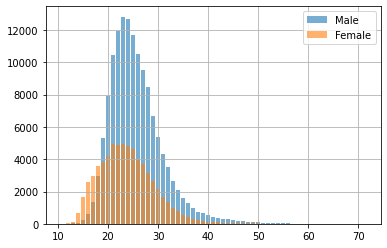

In [11]:
fig, ax = plt.subplots()
Male = ax.bar(countageM['Age'],countageM['count'], label='Male', alpha=0.6)
Female = ax.bar(countageF['Age'], countageF['count'], label='Female', alpha=0.6)
ax.legend()
plt.grid()
plt.show()

In [16]:
def stast(bbd:str, column, sex:str):
    qry=sql('''
    SELECT
    min({1}) as min,
    ROUND(avg({1}),2) as avg,
    max({1}) as max
    FROM {0}
    '''.format(bbd, column,sex))
    return qry

In [43]:
stastM = stast('countageM','Age','Male')
stastF = stast('countageF', 'Age','Female')
summary = pd.concat([stastM,stastF],keys=['Male','Female']).droplevel(level=1)

In [91]:
def stastplot(df):
    x = np.arange(len(df.iloc[0].index))
    width = 0.2
    plt.bar(x, df.iloc[0], width=0.2, label='Male',alpha=0.6)
    plt.bar(x + width, df.iloc[1],width=0.2, label='Female',alpha=0.6)
    plt.xticks(x, ['min','avg','max'], horizontalalignment="left")
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()
    

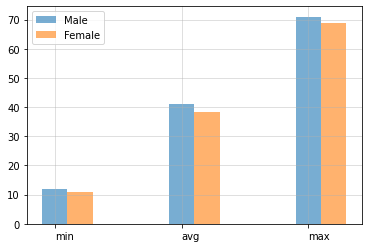

In [92]:
stastplot(summary)

In [90]:
summary

,min,avg,max
Male,12.0,41.03,71.0
Female,11.0,38.22,69.0
